<a href="https://colab.research.google.com/github/V-PRAMOD-REDDY/ml/blob/main/ml_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


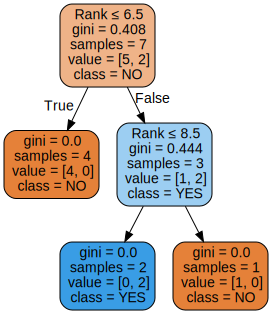

In [ ]:
# prompt: ADD PICTURE TREE, import sys
# import matplotlib
# matplotlib.use('Agg')
# import pandas
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
# import matplotlib.pyplot as plt
# df = pandas.read_csv("/content/DATA.csv")
# d = {'UK': 0, 'USA': 1, 'N': 2}
# df['Nationality'] = df['Nationality'].map(d)
# d = {'YES': 1, 'NO': 0}
# df['Go'] = df['Go'].map(d)
# features = ['Age', 'Experience', 'Rank', 'Nationality']
# X = df[features]
# y = df['Go']
# dtree = DecisionTreeClassifier()
# dree = dtree.fit(X,y)
# text_represenmtation = tree.export_text(dtree)
# print(text_represenmtation)
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree
# print(df)

# Install graphviz for visualizing the tree
!apt-get install graphviz -y
!pip install graphviz

import graphviz

# Generate the graphviz representation of the tree
dot_data = tree.export_graphviz(dtree, out_file=None,
                         feature_names=features,
                         class_names=['NO', 'YES'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)

# Render and display the graph
graph.render("decision_tree")
display(graph)

###EX-2


In [ ]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
# maximum of X array longitudinally
y = y/100
#Sigmoid Function
def sigmoid (x): return 1/(1 + np.exp(-x))
#Derivative of Sigmoid Function
def derivatives_sigmoid(x): return x * (1 - x)
#Variable initialization
epoch=5000
#Setting training iterations
lr=0.1
#Setting learning rate
inputlayer_neurons = 2
#number of features in data set
hiddenlayer_neurons = 3
#number of hidden layers neurons
output_neurons = 1
#number of neurons at output layer
#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
#draws a random range of numbers uniformly of dim x*y  for i in range(epoch):
#Forward Propogation
hinp1=np.dot(X,wh)
hinp=hinp1 + bh
hlayer_act = sigmoid(hinp)
outinp1=np.dot(hlayer_act,wout)
outinp= outinp1+ bout
output = sigmoid(outinp)
#Backpropagation
EO = y-output
outgrad = derivatives_sigmoid(output)
d_output = EO* outgrad
EH = d_output.dot(wout.T)
#how much hidden layer wts contributed to error
hiddengrad = derivatives_sigmoid(hlayer_act)
d_hiddenlayer = EH * hiddengrad
# dotproduct of nextlayererror and currentlayerop
wout += hlayer_act.T.dot(d_output) *lr
wh+= X.T.dot(d_hiddenlayer) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.92447043]
 [0.90956601]
 [0.92136322]]


###EX-3

Predicted Class: Class 1


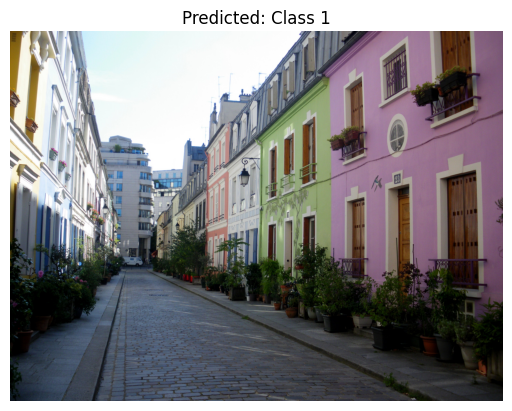

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define Model (MLP)
class SimpleMLP(nn.Module):
    def __init__(self, input_dim=3*224*224, hidden_dim=512, num_classes=2):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)  # 2 classes (adjust as needed)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Load the Model (Trained or New)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleMLP().to(device)
model.eval()  # Set to evaluation mode

# Define Image Transformations (Same as Training Data)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match MLP input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize (adjust based on training)
])

# Load and Preprocess the Image
image_path = "/content/drive/MyDrive/ml/training/non_food/1496.jpg"  # Change this to your image path
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

# Make Prediction
output = model(input_tensor)
_, predicted_class = torch.max(output, 1)

# Display Results
class_names = ["Class 0", "Class 1"]  # Modify based on your dataset
print(f"Predicted Class: {class_names[predicted_class.item()]}")

# Visualize Image
plt.imshow(image)
plt.title(f"Predicted: {class_names[predicted_class.item()]}")
plt.axis("off")
plt.show()


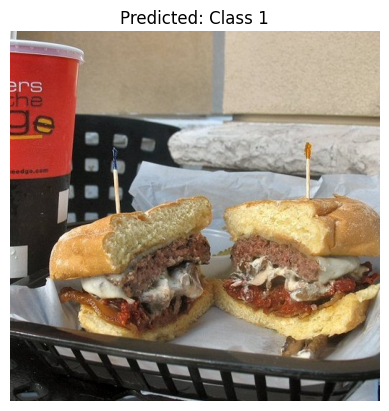

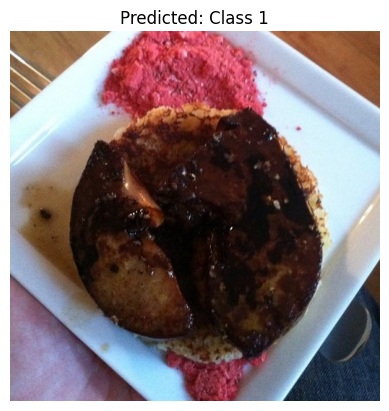

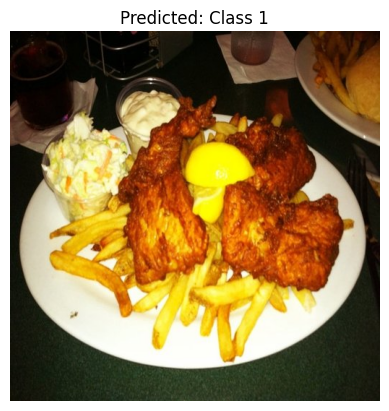

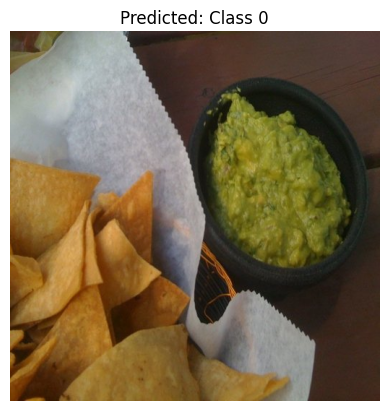

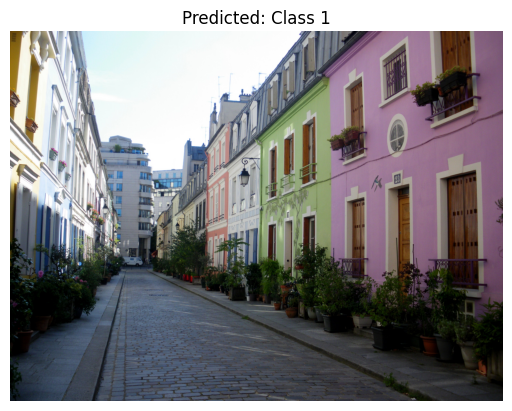

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define Model (MLP)
class SimpleMLP(nn.Module):
    def __init__(self, input_dim=3*224*224, hidden_dim=512, num_classes=2):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)  # 2 classes (adjust as needed)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Load the Model (Trained or New)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleMLP().to(device)
model.eval()  # Set to evaluation mode

# Define Image Transformations (Same as Training Data)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match MLP input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Adjust mean/std for RGB
])

# Load and Preprocess the Image
image_paths = ["/content/1.jpg", "/content/2.jpg","/content/3.jpg","/content/4.jpg","/content/drive/MyDrive/ml/training/non_food/1496.jpg"]  # Change these to your image paths
images = [Image.open(path).convert('RGB') for path in image_paths]
input_tensors = torch.stack([transform(img) for img in images]).to(device)  # Batch of 2 images

# Make Predictions
outputs = model(input_tensors)
_, predicted_classes = torch.max(outputs, 1)

# Display Results
class_names = ["Class 0", "Class 1"]  # Modify based on your dataset
for i, img in enumerate(images):
    plt.figure()
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_classes[i].item()]}")
    plt.axis("off")
    plt.show()


## Ex-4

In [ ]:
import pandas as pd

# Creating the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Save the dataset as a CSV file
df.to_csv('tennisdata.csv', index=False)

print("Dataset has been saved as 'tennisdata.csv'")


Dataset has been saved as 'tennisdata.csv'


In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('/content/tennisdata.csv')
print("The first 5 values of data is:\n",data.head())

X = data.iloc[:,:-1]
print("\n The first 5 vakues of Train data is\n", X.head())
y = data.iloc[:,-1]
print("\nThe first 5 values of Train output is\n",y.head())

le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Temperature)
le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)
le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)
le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy)

print("\nNow the Train data is\n",X.head())
le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print("Accuracy is:", accuracy_score(classifier.predict(X_test), y_test))


The first 5 values of data is:
     Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3      Rain        Mild     High  False        Yes
4      Rain        Cool   Normal  False        Yes

 The first 5 vakues of Train data is
     Outlook Temperature Humidity  Windy
0     Sunny         Hot     High  False
1     Sunny         Hot     High   True
2  Overcast         Hot     High  False
3      Rain        Mild     High  False
4      Rain        Cool   Normal  False

The first 5 values of Train output is
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

Now the Train data is
    Outlook  Temperature  Humidity  Windy
0        1            1         0      0
1        1            1         0      1
2        1            1         0      0
3        2            2         0      0
4        0            0         1    

## Ex-5

In [ ]:
import pandas as pd

data = {
    "message": [
        "I love this product, it's amazing!",
        "This is the worst purchase I’ve ever made.",
        "Absolutely fantastic experience!",
        "I am very disappointed with the service.",
        "The quality exceeded my expectations.",
        "Totally not worth the money.",
        "Support team was very helpful and kind.",
        "The item broke after one use.",
        "I'm really happy with my decision.",
        "The delivery was super late and damaged.",
        "Such a great value for the price!",
        "I regret buying this, it's awful.",
        "The app works flawlessly.",
        "This product is a complete waste.",
        "Incredible customer service and fast response."
    ],
    "label": [
        "pos", "neg", "pos", "neg", "pos", "neg", "pos", "neg",
        "pos", "neg", "pos", "neg", "pos", "neg", "pos"
    ]
}

df = pd.DataFrame(data)
df.to_csv("sentiment_dataset.csv", index=False)

print("CSV file saved as 'sentiment_dataset.csv'")


CSV file saved as 'sentiment_dataset.csv'


In [ ]:
import pandas as pd
msg = pd.read_csv(r"/content/sentiment_dataset.csv", 										names=['message', 'label'])
print("Total Instances of Dataset: ", msg.shape[0])
msg['labelnum'] = msg.label.map({'pos': 1, 'neg': 0})

msg.dropna(subset=['labelnum'], inplace=True)

X = msg.message
y = msg.labelnum
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
from sklearn.feature_extraction.text import CountVectorizer

count_v = CountVectorizer()
Xtrain_dm = count_v.fit_transform(Xtrain)
Xtest_dm = count_v.transform(Xtest)

df = pd.DataFrame(Xtrain_dm.toarray(),columns=count_v.get_feature_names_out())
print(df[0:5])

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain_dm, ytrain)
pred = clf.predict(Xtest_dm)

for doc, p in zip(Xtrain, pred):
    p = 'pos' if p == 1 else 'neg'
    print("%s -> %s" % (doc, p))
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print('Accuracy Metrics: \n')
print('Accuracy: ', accuracy_score(ytest, pred))
print('Recall: ', recall_score(ytest, pred))
print('Precision: ', precision_score(ytest, pred))
print('Confusion Matrix: \n', confusion_matrix(ytest, pred))

Total Instances of Dataset:  16
   absolutely  after  am  amazing  and  app  awful  broke  buying  complete  \
0           0      0   0        0    1    0      0      0       0         0   
1           0      0   0        0    0    0      0      0       0         0   
2           1      0   0        0    0    0      0      0       0         0   
3           0      0   0        0    0    0      0      0       0         1   
4           0      0   0        0    0    1      0      0       0         0   

   ...  team  the  this  use  value  very  was  waste  with  works  
0  ...     0    0     0    0      0     0    0      0     0      0  
1  ...     0    0     0    0      0     0    0      0     1      0  
2  ...     0    0     0    0      0     0    0      0     0      0  
3  ...     0    0     1    0      0     0    0      1     0      0  
4  ...     0    1     0    0      0     0    0      0     0      1  

[5 rows x 47 columns]
Incredible customer service and fast response. -> pos
I'

## Ex-6

In [ ]:
#!pip install pgmpy
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Load data
data = pd.read_csv('/content/heart.csv')
heart_disease = pd.DataFrame(data)
print(heart_disease)

# Define model
model = DiscreteBayesianNetwork([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family', 'heartdisease'),
    ('diet', 'cholestrol'),
    ('Lifestyle', 'diet'),
    ('cholestrol', 'heartdisease')
])

# Fit the model using Maximum Likelihood Estimation
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

# Perform inference
Heart_Disease_infer = VariableElimination(model)

# Input instructions
print('For Age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4')
print('For Gender Enter Male:0, Female:1')
print('For Family History Enter yes:1, No:0')
print('For Diet Enter High:0, Medium:1')
print('For Lifestyle Enter Athlete:0, Active:1, Moderate:2, Sedentary:3')
print('For Cholesterol Enter High:0, BorderLine:1, Normal:2')

# Query
q = Heart_Disease_infer.query(variables=['heartdisease'], evidence={
    'age': int(input('Enter Age: ')),
    'Gender': int(input('Enter Gender: ')),
    'Family': int(input('Enter Family History: ')),
    'diet': int(input('Enter Diet: ')),
    'Lifestyle': int(input('Enter Lifestyle: ')),
    'cholestrol': int(input('Enter Cholestrol: '))
})
print(q)


    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       1     0          2           1             1
3     4       0       0     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       1     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       0     1          3           2             1
12    2       1       1     0          0           0             0
13    3       0       0     1          1           0          

KeyError: 'state: 2 is an unknown for variable: diet. It must be one of [np.int64(0), np.int64(1)]'

In [ ]:
import pandas as pd

# Create the dataset as a dictionary
data = {
    'age': [0, 0, 1, 4, 3, 2, 4, 0, 3, 1, 4, 4, 2, 3, 0, 1, 3, 4, 2],
    'Gender': [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    'Family': [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
    'diet': [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1],
    'Lifestyle': [3, 3, 2, 3, 0, 1, 2, 3, 0, 0, 2, 3, 0, 1, 0, 0, 2, 0, 3],
    'cholestrol': [0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2],
    'heartdisease': [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]
}

# Convert the dictionary to a DataFrame
heart_disease_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
heart_disease_df.to_csv('heart.csv', index=False)

# Print the DataFrame to verify the contents
print(heart_disease_df)


    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       1     0          2           1             1
3     4       0       0     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       1     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       0     1          3           2             1
12    2       1       1     0          0           0             0
13    3       0       0     1          1           0          

In [ ]:
import pandas as pd
from pgmpy.models import BayesianNetwork  # Use BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.datasets import load_asia

# Load the dataset (Asia dataset is a small example dataset in pgmpy)
data = load_asia()

# Print the first few rows of the dataset to understand its structure
print(data.head())

# Define the Bayesian Network Model
model = BayesianNetwork([
    ('Smoking', 'Lung Cancer'),
    ('Tuberculosis', 'Lung Cancer'),
    ('Lung Cancer', 'Visit to Doctor'),
    ('Bronchitis', 'Visit to Doctor'),
    ('Visit to Doctor', 'X-ray')
])

# Fit the model using MaximumLikelihoodEstimator
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference using Variable Elimination
Heart_Disease_infer = VariableElimination(model)

# Example of user input for making inference
print("For Smoking: 0 = No, 1 = Yes")
print("For Tuberculosis: 0 = No, 1 = Yes")
print("For Lung Cancer: 0 = No, 1 = Yes")
print("For Visit to Doctor: 0 = No, 1 = Yes")
print("For Bronchitis: 0 = No, 1 = Yes")
print("For X-ray: 0 = No, 1 = Yes")

# Querying for 'Lung Cancer' given other evidence
q = Heart_Disease_infer.query(
    variables=['Lung Cancer'],
    evidence={
        'Smoking': int(input('Enter Smoking (0/1): ')),
        'Tuberculosis': int(input('Enter Tuberculosis (0/1): ')),
        'Bronchitis': int(input('Enter Bronchitis (0/1): ')),
        'Visit to Doctor': int(input('Enter Visit to Doctor (0/1): ')),
        'X-ray': int(input('Enter X-ray (0/1): '))
    }
)

# Print the result of the query
print(q)


ModuleNotFoundError: No module named 'pgmpy'

In [ ]:
import pandas as pd
import numpy as np
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Create a simple synthetic dataset for the Asia Network
data = pd.DataFrame({
    'Smoking': np.random.choice([0, 1], size=1000),
    'Tuberculosis': np.random.choice([0, 1], size=1000),
    'Lung Cancer': np.random.choice([0, 1], size=1000),
    'Visit to Doctor': np.random.choice([0, 1], size=1000),
    'Bronchitis': np.random.choice([0, 1], size=1000),
    'X-ray': np.random.choice([0, 1], size=1000)
})

# Print the first few rows of the synthetic dataset
print(data.head())

# Define the Bayesian Network Model
model = DiscreteBayesianNetwork([
    ('Smoking', 'Lung Cancer'),
    ('Tuberculosis', 'Lung Cancer'),
    ('Lung Cancer', 'Visit to Doctor'),
    ('Bronchitis', 'Visit to Doctor'),
    ('Visit to Doctor', 'X-ray')
])

# Fit the model using MaximumLikelihoodEstimator
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference using Variable Elimination
Heart_Disease_infer = VariableElimination(model)

# Example of user input for making inference
print("For Smoking: 0 = No, 1 = Yes")
print("For Tuberculosis: 0 = No, 1 = Yes")
print("For Lung Cancer: 0 = No, 1 = Yes")
print("For Visit to Doctor: 0 = No, 1 = Yes")
print("For Bronchitis: 0 = No, 1 = Yes")
print("For X-ray: 0 = No, 1 = Yes")

# Querying for 'Lung Cancer' given other evidence
q = Heart_Disease_infer.query(
    variables=['Lung Cancer'],
    evidence={
        'Smoking': int(input('Enter Smoking (0/1): ')),
        'Tuberculosis': int(input('Enter Tuberculosis (0/1): ')),
        'Bronchitis': int(input('Enter Bronchitis (0/1): ')),
        'Visit to Doctor': int(input('Enter Visit to Doctor (0/1): ')),
        'X-ray': int(input('Enter X-ray (0/1): '))
    }
)

# Print the result of the query
print(q)


   Smoking  Tuberculosis  Lung Cancer  Visit to Doctor  Bronchitis  X-ray
0        0             0            1                1           0      1
1        1             0            1                0           0      1
2        1             0            0                1           0      1
3        1             1            0                0           0      0
4        0             1            1                1           1      1
For Smoking: 0 = No, 1 = Yes
For Tuberculosis: 0 = No, 1 = Yes
For Lung Cancer: 0 = No, 1 = Yes
For Visit to Doctor: 0 = No, 1 = Yes
For Bronchitis: 0 = No, 1 = Yes
For X-ray: 0 = No, 1 = Yes
Enter Smoking (0/1): 0
Enter Tuberculosis (0/1): 0
Enter Bronchitis (0/1): 1
Enter Visit to Doctor (0/1): 4
Enter X-ray (0/1): 1


KeyError: 'state: 4 is an unknown for variable: Visit to Doctor. It must be one of [np.int64(0), np.int64(1)]'

In [ ]:
import pandas as pd
import numpy as np
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Generate a small synthetic dataset
np.random.seed(42)

# Number of samples
n_samples = 100

# Simulate categorical data
age = np.random.choice([0, 1, 2, 3, 4], size=n_samples)  # Age categories
gender = np.random.choice([0, 1], size=n_samples)  # Gender: Male(0), Female(1)
family = np.random.choice([1, 0], size=n_samples)  # Family History: Yes(1), No(0)
diet = np.random.choice([0, 1], size=n_samples)  # Diet: High(0), Medium(1)
lifestyle = np.random.choice([0, 1, 2, 3], size=n_samples)  # Lifestyle categories
cholesterol = np.random.choice([0, 1, 2], size=n_samples)  # Cholesterol: High(0), BorderLine(1), Normal(2)
heartdisease = np.random.choice([0, 1], size=n_samples)  # Heart Disease: Yes(1), No(0)

# Create the DataFrame
data = pd.DataFrame({
    'age': age,
    'Gender': gender,
    'Family': family,
    'diet': diet,
    'Lifestyle': lifestyle,
    'cholestrol': cholesterol,
    'heartdisease': heartdisease
})

# Print the first few rows to see the dataset
print(data.head())

# Define the Bayesian Network model
model = DiscreteBayesianNetwork([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family', 'heartdisease'),
    ('diet', 'cholestrol'),
    ('Lifestyle', 'diet'),
    ('cholestrol', 'heartdisease'),
    ('diet', 'cholestrol')
])

# Fit the model using MaximumLikelihoodEstimator
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference using Variable Elimination
Heart_Disease_infer = VariableElimination(model)

# Example of user input for making inference
print("For Age: SuperSeniorCitizen=0, SeniorCitizen=1, MiddleAged=2, Youth=3, Teen=4")
print("For Gender: Male=0, Female=1")
print("For Family History: Yes=1, No=0")
print("For Diet: High=0, Medium=1")
print("For Lifestyle: Athlete=0, Active=1, Moderate=2, Sedentary=3")
print("For Cholesterol: High=0, BorderLine=1, Normal=2")

# Querying for 'heartdisease' given other evidence
q = Heart_Disease_infer.query(
    variables=['heartdisease'],
    evidence={
        'age': int(input('Enter Age (0-4): ')),
        'Gender': int(input('Enter Gender (0=Male, 1=Female): ')),
        'Family': int(input('Enter Family History (0=No, 1=Yes): ')),
        'diet': int(input('Enter Diet (0=High, 1=Medium): ')),
        'Lifestyle': int(input('Enter Lifestyle (0=Athlete, 1=Active, 2=Moderate, 3=Sedentary): ')),
        'cholestrol': int(input('Enter Cholesterol (0=High, 1=BorderLine, 2=Normal): '))
    }
)

# Print the result of the query
print(q)


   age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0    3       1       1     0          2           1             1
1    4       0       1     1          1           2             0
2    2       0       0     0          0           2             1
3    4       1       1     0          1           2             1
4    4       1       1     1          0           1             1
For Age: SuperSeniorCitizen=0, SeniorCitizen=1, MiddleAged=2, Youth=3, Teen=4
For Gender: Male=0, Female=1
For Family History: Yes=1, No=0
For Diet: High=0, Medium=1
For Lifestyle: Athlete=0, Active=1, Moderate=2, Sedentary=3
For Cholesterol: High=0, BorderLine=1, Normal=2
Enter Age (0-4): 20
Enter Gender (0=Male, 1=Female): 0
Enter Family History (0=No, 1=Yes): 1
Enter Diet (0=High, 1=Medium): 1
Enter Lifestyle (0=Athlete, 1=Active, 2=Moderate, 3=Sedentary): 0
Enter Cholesterol (0=High, 1=BorderLine, 2=Normal): 2


KeyError: 'state: 20 is an unknown for variable: age. It must be one of [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]'

##EX-9

In [4]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

matrix = array([[5,6],[8,10],[12,8]])
print("Original matrix")
print(matrix)

Mean_col = mean(matrix.T,axis=1)
print("Mean of each column:")
print(Mean_col)

Centre_col = matrix - Mean_col
print("Centered matrix:")
print(Centre_col)

cov_matrix = cov(Centre_col.T)
print("Covariance matrix:")
print(cov_matrix)

values, vectors = eig(cov_matrix)
print("Eigenvalues:")
print(values)
print("Eigenvectors:")
print(vectors)

project_data = vectors.T.dot(Centre_col.T)
print("Projected data:")
print(project_data.T)

Original matrix
[[ 5  6]
 [ 8 10]
 [12  8]]
Mean of each column:
[8.33333333 8.        ]
Centered matrix:
[[-3.33333333 -2.        ]
 [-0.33333333  2.        ]
 [ 3.66666667  0.        ]]
Covariance matrix:
[[12.33333333  3.        ]
 [ 3.          4.        ]]
Eigenvalues:
[13.30097393  3.0323594 ]
Eigenvectors:
[[ 0.95171801 -0.30697366]
 [ 0.30697366  0.95171801]]
Projected data:
[[-3.78634069 -0.88019048]
 [ 0.29670799  2.00576057]
 [ 3.4896327  -1.12557009]]


K-NN

Accuracy: 1.0
Accuracy: 1.0
[[1 0]
 [0 1]]
[[1 0]
 [0 1]]


<Axes: >

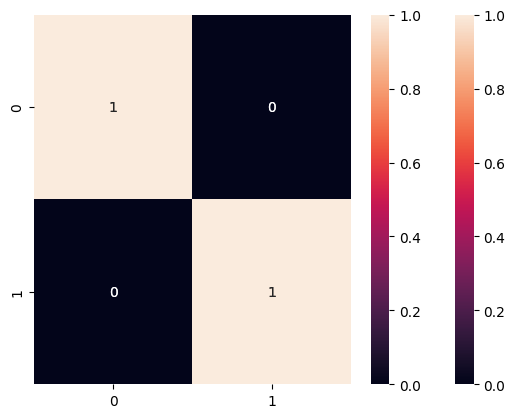

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
df = pd.read_csv('/content/mock_diabetes.csv')
df.head()
X = df.drop("species",axis=1)
X.head()
y = df["species"]
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
classifier2 = KNeighborsClassifier(n_neighbors=3)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
y_pred2
acc2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", acc2)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
sns.heatmap(cm2, annot=True)

In [9]:
import pandas as pd

# Create a small mock diabetes dataset
data = {
    "Pregnancies": [6, 1, 8, 1, 0, 5, 3, 10, 2, 1],
    "Glucose": [148, 85, 183, 89, 137, 116, 78, 115, 197, 189],
    "BloodPressure": [72, 66, 64, 66, 40, 74, 50, 0, 70, 60],
    "SkinThickness": [35, 29, 0, 23, 35, 0, 32, 0, 45, 23],
    "Insulin": [0, 0, 0, 94, 168, 0, 88, 0, 543, 846],
    "BMI": [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 30.1],
    "DiabetesPedigreeFunction": [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158, 0.398],
    "Age": [50, 31, 32, 21, 33, 30, 26, 29, 53, 59],
    "species": [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("mock_diabetes.csv", index=False)

print("mock_diabetes.csv has been saved successfully.")


mock_diabetes.csv has been saved successfully.
